In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 폰트
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 경우 "Malgun Gothic" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


# Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.해 주세요!

In [20]:
# 1. 시점에서 연도와 분기 파생변수 생성
def extract_year_quarter(row):
    year, quarter = row.split('.')
    quarter = quarter.split('/')[0]  # '/' 앞부분만 추출
    return int(year), int(quarter)

# 연도와 분기를 추출하여 새로운 컬럼에 할당
df[['연도', '분기']] = df['시점'].apply(lambda x: pd.Series(extract_year_quarter(x)))

# 2. 데이터 컬럼을 백만 단위로 변경하고 이름 변경
df['백만'] = df['데이터'] / 1_000_000

# 3. 불필요한 '데이터' 컬럼 삭제
df = df.drop(columns=['데이터'])

# 4. 기술 통계 확인
# 수치형 데이터로 변환 확인
df['백만'] = pd.to_numeric(df['백만'], errors='coerce')
df['연도'] = pd.to_numeric(df['연도'], errors='coerce')
df['분기'] = pd.to_numeric(df['분기'], errors='coerce')

# 기술 통계 출력
description = df[['백만', '연도', '분기']].describe()
print(description)

                 백만           연도           분기
count  2.772000e+03  2772.000000  2772.000000
mean   1.613117e-09  2019.272727     2.409091
std    4.273426e-09     1.600909     1.114533
min   -1.000300e-08  2017.000000     1.000000
25%    4.175000e-11  2018.000000     1.000000
50%    2.915000e-10  2019.000000     2.000000
75%    1.181000e-09  2021.000000     3.000000
max    4.768900e-08  2022.000000     4.000000


# Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

In [34]:
# 시점에서 연도 추출하여 새로운 컬럼에 할당
def extract_year(row):
    year, _ = row.split('.')
    return int(year)

df['연도'] = df['시점'].apply(extract_year)

# 1. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계 계산
pivot_df = df.pivot_table(values='백만', index='국가(대륙)별', columns='연도', aggfunc='sum', fill_value=0)

# 2. 피벗 테이블 출력
pivot_df

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,4.157100e-08,3.614100e-08,4.095000e-08,4.443800e-08,5.795900e-08,1.950100e-08
대양주,1.898900e-08,1.752000e-08,1.319100e-08,1.625500e-08,1.684100e-08,5.044000e-09
미국,1.422920e-07,1.563120e-07,1.866170e-07,2.553840e-07,2.775790e-07,1.034160e-07
아세안(ASEAN),6.616300e-08,7.645000e-08,8.293000e-08,1.053600e-07,9.415000e-08,3.807200e-08
유럽연합(EU),3.106800e-08,3.682600e-08,3.900800e-08,3.986500e-08,3.234900e-08,9.019000e-09
일본,1.254420e-07,1.780940e-07,1.893300e-07,2.207300e-07,2.800290e-07,1.317710e-07
중국,1.672400e-07,1.820680e-07,2.104180e-07,2.894460e-07,1.943800e-07,9.857200e-08
중남미,1.024500e-08,1.166900e-08,1.298100e-08,1.256300e-08,8.298000e-09,2.629000e-09
중동,8.030000e-09,8.019000e-09,9.325000e-09,1.146700e-08,6.164000e-09,1.389000e-09


# Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

상품군별          가전·전자·통신기기           기 타         농축수산물         사무·문구  \
국가(대륙)별                                                              
기타          1.716000e-09  3.345000e-09  9.000000e-12  1.870000e-10   
대양주         3.825000e-09  9.230000e-10  1.000000e-12  2.100000e-11   
미국          1.010300e-08  3.873100e-08  3.300000e-11  3.980000e-10   
아세안(ASEAN)  1.240500e-08  2.620000e-09  1.700000e-11  3.279000e-09   
유럽연합(EU)    3.040000e-09  3.907000e-09  0.000000e+00  2.500000e-11   
일본          4.040000e-10  3.050900e-08  2.000000e-12  1.526000e-09   
중국          1.353000e-09  2.273600e-08  8.800000e-11  4.030000e-10   
중남미         9.120000e-10  6.250000e-10  0.000000e+00  3.000000e-12   
중동          8.390000e-10  5.330000e-10  0.000000e+00  4.000000e-12   

상품군별        생활용품 및 자동차용품           서 적         소프트웨어      스포츠·레저용품  \
국가(대륙)별                                                              
기타          1.464000e-09  4.563000e-09  2.100000e-11  7.550000e-10   
대양주         1.19800

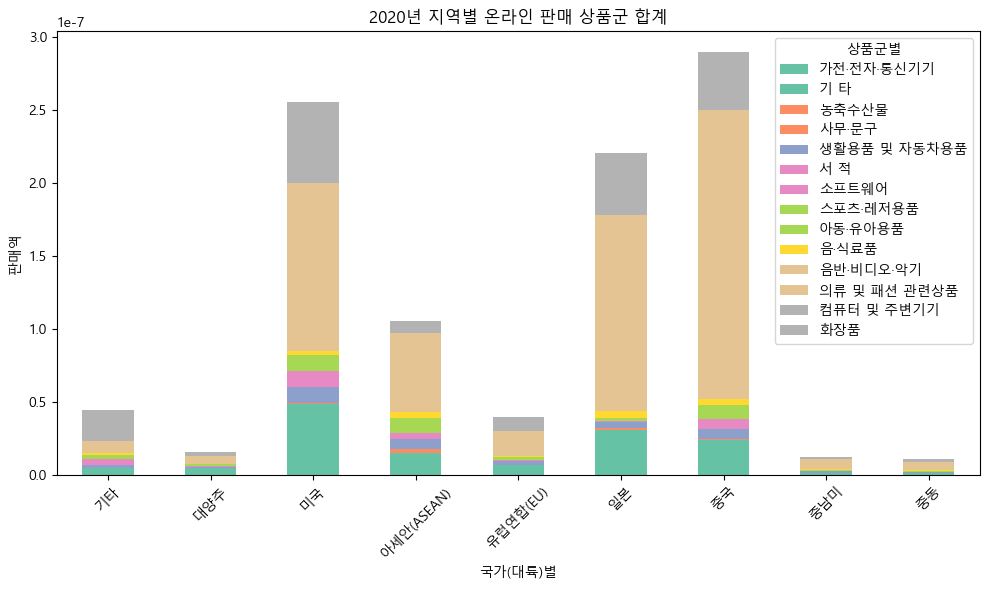

In [38]:
# 시점에서 연도만 추출하여 새로운 컬럼에 할당
df['연도'] = df['시점'].apply(lambda x: int(x.split('.')[0]))

# 2020년 데이터 필터링
df_2020 = df[df['연도'] == 2020]

# groupby와 unstack을 사용하여 지역별 합계 계산
grouped_df = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack(fill_value=0)

# 2. 합계 결과 출력
print(grouped_df)

# 3. 시각화
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('2020년 지역별 온라인 판매 상품군 합계')
plt.xlabel('국가(대륙)별')
plt.ylabel('판매액')
plt.xticks(rotation=45)
plt.legend(title='상품군별')
plt.tight_layout()
plt.show()

# Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

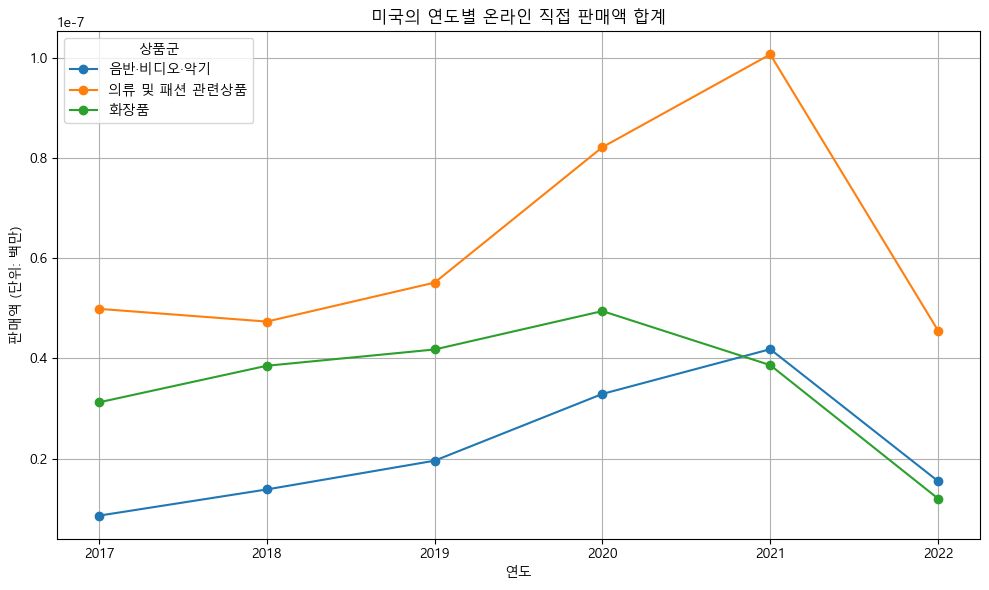

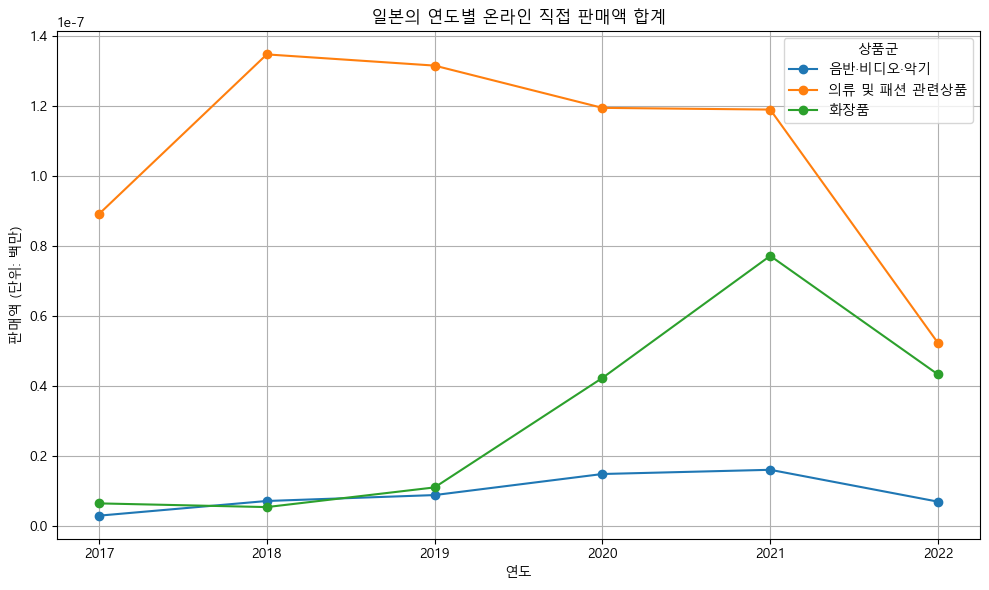

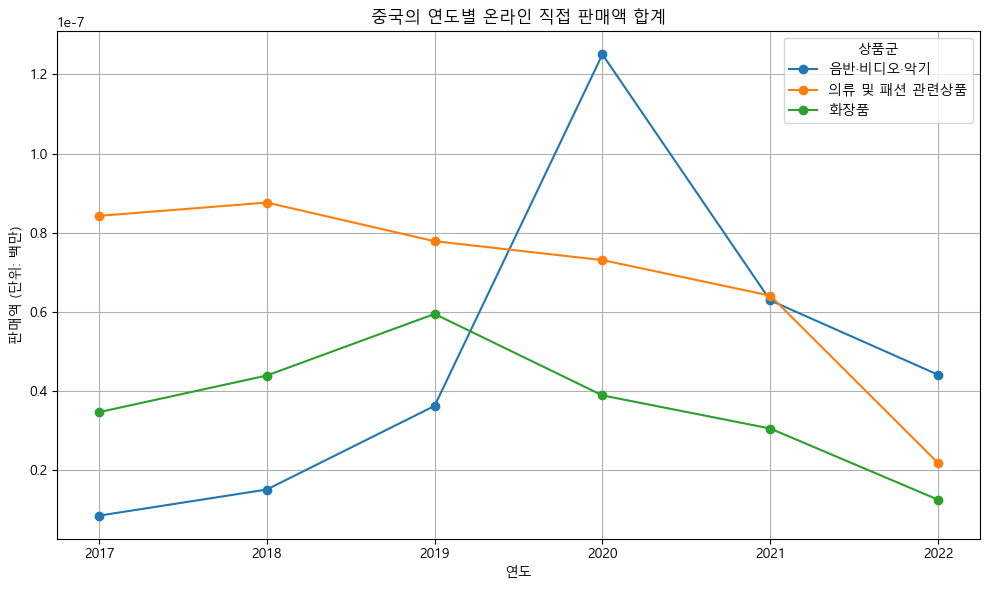

In [58]:
# 필요한 데이터 필터링
filtered_df = df[(df['국가(대륙)별'].isin(['미국', '중국', '일본'])) &
                 (df['상품군별'].isin(['의류 및 패션 관련상품', '화장품', '음반·비디오·악기']))]

# 연도별, 국가별, 상품군별 판매액 합계 계산
grouped_df = filtered_df.groupby(['연도', '국가(대륙)별', '상품군별'])['백만'].sum().reset_index()

# 국가별로 그래프 그리기
for country in grouped_df['국가(대륙)별'].unique():
    plt.figure(figsize=(10, 6))
    country_data = grouped_df[grouped_df['국가(대륙)별'] == country]
    
    for product in country_data['상품군별'].unique():
        product_data = country_data[country_data['상품군별'] == product]
        plt.plot(product_data['연도'], product_data['백만'], marker='o', label=product)

    plt.title(f'{country}의 연도별 온라인 직접 판매액 합계')
    plt.xlabel('연도')
    plt.ylabel('판매액 (단위: 백만)')
    plt.xticks(sorted(country_data['연도'].unique()))
    plt.legend(title='상품군')
    plt.grid()
    plt.tight_layout()
    plt.show()